In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

14.00296332375575 -161.4645685271844
-15.37467164350953 -96.9541830474356
24.67925658822635 -84.66718779793364
53.78065990579759 120.66319442296543
-81.02402382684862 -1.4751996880085585
-57.81099427312624 119.01073986444277
73.963438106208 -30.6055913169169
64.40090923343143 -59.1007805958355
62.95631560272267 100.33892872568316
-82.59452536487296 -22.5200682872792
-10.029952178450003 -153.73127068689456
-78.8763340161674 27.720143395234317
-46.86569595727134 42.693176700550055
21.049172916528477 -8.851413861336482
24.42816682854388 90.38253491458391
-51.08106212463603 174.2122282776068
49.55735799935823 168.15323816231142
54.5199043926618 154.42833586883268
80.46410591438016 -59.18093530176789
-4.434980925709894 149.4933893987121
-0.31577145854063815 -70.64729409272569
82.71562473440122 -81.20944709621749
44.41472140587467 112.20622385710845
69.8323315247585 -16.258453140634998
-44.658978112638565 154.93472906415525
-15.048603558718582 26.411649368467494
63.106191189681226 -177.40928

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
#import the time library and the datetime module from the datetime library

import time
from datetime import datetime
#import the API key
#import requests

import requests

#import the API key

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#create an empty list to hold the weather data

city_data=[]

#print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makakilo city
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | puerto ayora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | bahia honda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | amazar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | gimli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | sur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | yulara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 2 | bambous virieux
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 2 | new norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 2 | pshekhskaya
-----------------------------
Data Retrieval Complete      
----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | deputatskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | lagoa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | touros
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 3 | port-gentil
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 3 | abu samrah
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 3 | general roca
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 3 | primorsko-akhtarsk
-----------------------------
Data Retrieval Complete      
------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | toktogul
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | asekeyevo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 4 | pisco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 4 | tanuku
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 4 | yining
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 4 | lakatoro
-----------------------------
Data Retrieval Complete    

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | ukiah
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | virginia beach
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 6 | bolungarvik
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 6 | kingsland
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 6 | arman
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 6 | daokou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 6 | victoria
-----------------------------
Data Retrieval Complete     

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | leningradskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | margate
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 7 | roald
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 7 | marshalltown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 7 | alenquer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 7 | huntsville
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 7 | marti
-----------------------------
Data Retrieval Complete      
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | bella vista
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | ulladulla
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | meyungs
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 8 | dicabisagan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 8 | saint-pierre
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 8 | baykit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 8 | champerico
-----------------------------
Data Retrieval 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | ibia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | akyab
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | alta floresta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 9 | ongandjera
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 9 | flinders
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 9 | narsaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 9 | impfondo
-----------------------------
Data Retrieval Complete      
-------------------------

Processing Record 1 of Set 11 | emerald
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | wangqing
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | dubrovytsya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | morros
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | maltahohe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 11 | naifaru
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 11 | lorengau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 11 | benjamin aceval
-----------------------------
Data 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | zomba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | plouzane
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | gamba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 12 | rawson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 12 | savannakhet
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 12 | ustka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 12 | kjollefjord
-----------------------------
Data Retrieval Complete      
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Makakilo City,21.3469,-158.0858,79.02,58,20,12.66,US,2022-12-21 00:53:56
1,Puerto Ayora,-0.7393,-90.3518,72.55,93,54,4.00,EC,2022-12-21 00:48:15
2,Bahia Honda,22.9036,-83.1592,74.57,79,25,0.40,CU,2022-12-21 00:53:56
3,Amazar,53.8580,120.8750,-24.11,94,14,3.38,RU,2022-12-21 00:53:57
4,Hermanus,-34.4187,19.2345,59.81,68,11,14.14,ZA,2022-12-21 00:47:00
5,Albany,42.6001,-73.9662,25.45,90,39,4.63,US,2022-12-21 00:43:46
6,Sisimiut,66.9395,-53.6735,17.49,62,46,4.94,GL,2022-12-21 00:53:57
7,Tura,25.5198,90.2201,58.19,81,11,3.00,IN,2022-12-21 00:53:58
8,Ushuaia,-54.8000,-68.3000,51.46,71,40,14.97,AR,2022-12-21 00:46:58
9,Faanui,-16.4833,-151.7500,80.82,76,29,17.76,PF,2022-12-21 00:49:20


In [10]:
#create new column order
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Makakilo City,US,2022-12-21 00:53:56,21.3469,-158.0858,79.02,58,20,12.66
1,Puerto Ayora,EC,2022-12-21 00:48:15,-0.7393,-90.3518,72.55,93,54,4.00
2,Bahia Honda,CU,2022-12-21 00:53:56,22.9036,-83.1592,74.57,79,25,0.40
3,Amazar,RU,2022-12-21 00:53:57,53.8580,120.8750,-24.11,94,14,3.38
4,Hermanus,ZA,2022-12-21 00:47:00,-34.4187,19.2345,59.81,68,11,14.14
5,Albany,US,2022-12-21 00:43:46,42.6001,-73.9662,25.45,90,39,4.63
6,Sisimiut,GL,2022-12-21 00:53:57,66.9395,-53.6735,17.49,62,46,4.94
7,Tura,IN,2022-12-21 00:53:58,25.5198,90.2201,58.19,81,11,3.00
8,Ushuaia,AR,2022-12-21 00:46:58,-54.8000,-68.3000,51.46,71,40,14.97
9,Faanui,PF,2022-12-21 00:49:20,-16.4833,-151.7500,80.82,76,29,17.76


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#extract relevant fields for from the dataframe
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]


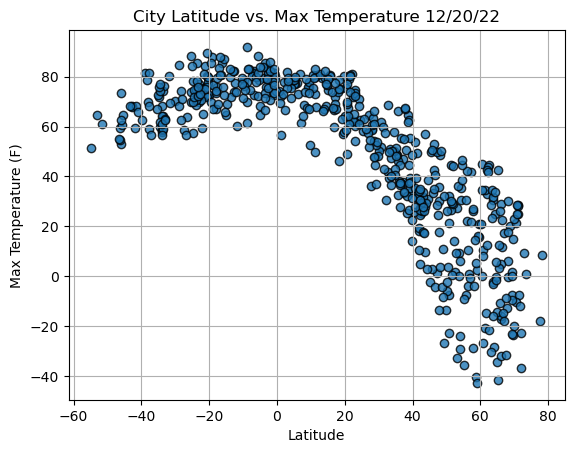

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

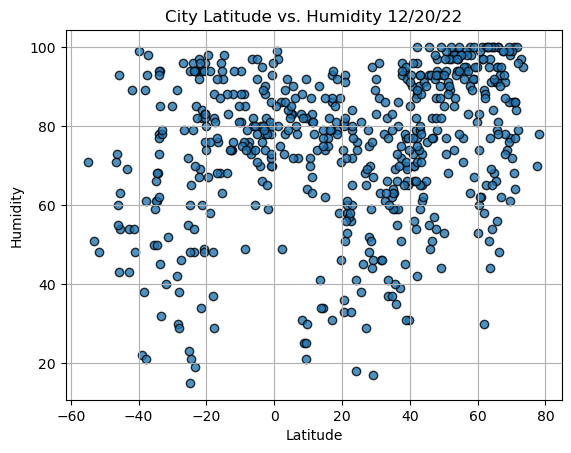

In [14]:
#plot latitude vs Humidity

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# save fig

plt.savefig("weather_data/Fig2.png")

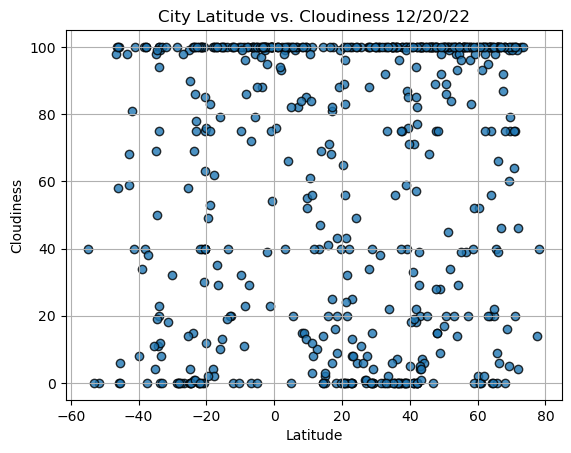

In [15]:
#plt latitude vs cloudiness

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save figure

plt.savefig("weather_data/Fig3.png")

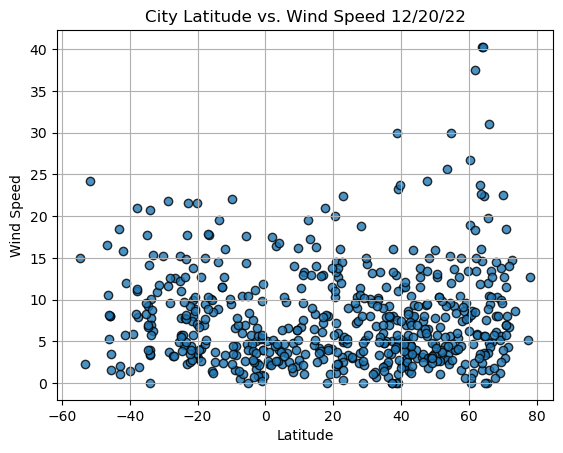

In [16]:
# plot latitude vs wind speed
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save fig

plt.savefig("weather_data/Fig4.png")

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]

index13

City                      Dunedin
Country                        NZ
Date          2022-12-21 00:49:20
Lat                      -45.8742
Lng                      170.5036
Max Temp                    52.81
Humidity                       93
Cloudiness                    100
Wind Speed                   8.01
Name: 13, dtype: object

In [19]:
#filter data to find all latitude >= 0

city_data_df["Lat"] >= 0

#to return DataFrame with all data use .loc["the criteria we want"]

city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Makakilo City,US,2022-12-21 00:53:56,21.3469,-158.0858,79.02,58,20,12.66
2,Bahia Honda,CU,2022-12-21 00:53:56,22.9036,-83.1592,74.57,79,25,0.40
3,Amazar,RU,2022-12-21 00:53:57,53.8580,120.8750,-24.11,94,14,3.38
5,Albany,US,2022-12-21 00:43:46,42.6001,-73.9662,25.45,90,39,4.63
6,Sisimiut,GL,2022-12-21 00:53:57,66.9395,-53.6735,17.49,62,46,4.94


In [20]:
#create DataFrame for northern and southern hemisphere.

northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<=0)]

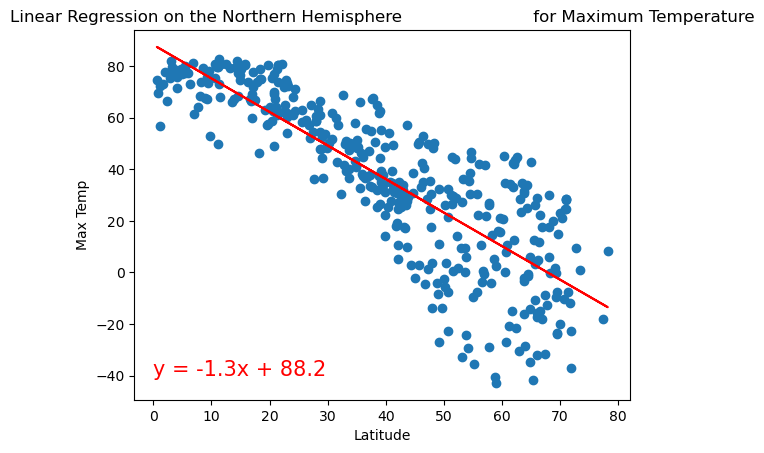

LinregressResult(slope=-1.300012341874393, intercept=88.20031156175538, rvalue=-0.8294734804153648, pvalue=3.522406284395834e-100, stderr=0.04444144080297912, intercept_stderr=1.988081776833133)

In [21]:
#create scatter plot / linear regression for N.Hemi Lat vs Max Temp.

x_values=northern_hemi_df["Lat"]

y_values=northern_hemi_df["Max Temp"]

#call the fuction:

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (0,-40))
    
linregress(x_values,y_values)

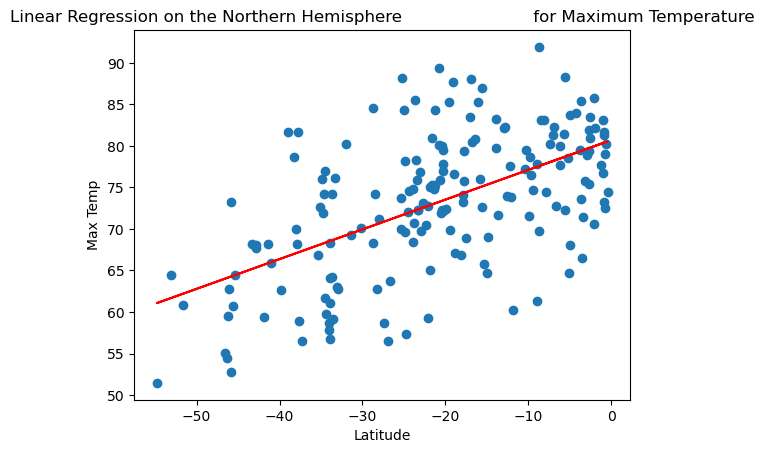

LinregressResult(slope=0.35805664232145845, intercept=80.69242019650332, rvalue=0.5690188909575804, pvalue=6.421520401490023e-17, stderr=0.03867601659074766, intercept_stderr=0.9594115570905534)

In [22]:
x_values=southern_hemi_df["Lat"]

y_values=southern_hemi_df["Max Temp"]

#call the fuction:

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,100))
linregress(x_values,y_values)

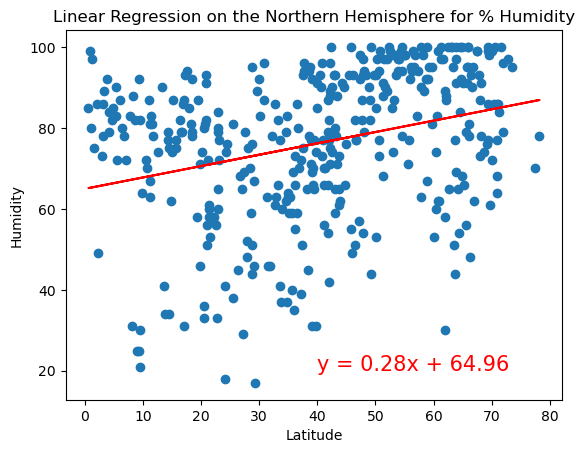

LinregressResult(slope=0.2804166485795242, intercept=64.95526335954287, rvalue=0.29891626477301836, pvalue=1.7183262082707323e-09, stderr=0.0454479091782801, intercept_stderr=2.033106001964929)

In [23]:
#perform linear regression on Percent Humidity for Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       'Humidity', (40,20))

linregress(x_values,y_values)

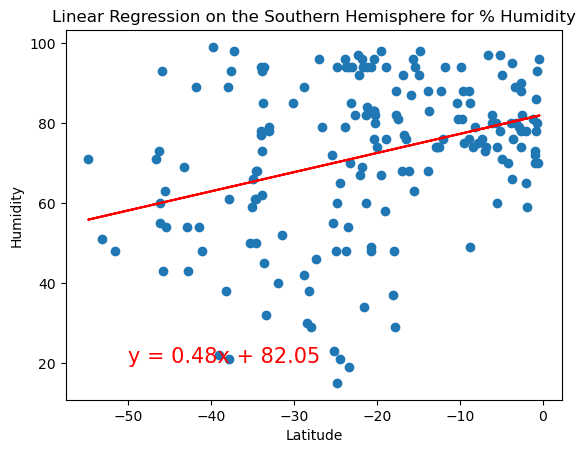

LinregressResult(slope=0.4784921079990936, intercept=82.05028626076802, rvalue=0.3296167440346843, pvalue=5.867930849378397e-06, stderr=0.10243864272654493, intercept_stderr=2.5411308192485564)

In [24]:
#perform linear regression on Percent Humidity for Southern Hemisphere

x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       'Humidity', (-50,20))

linregress(x_values,y_values)

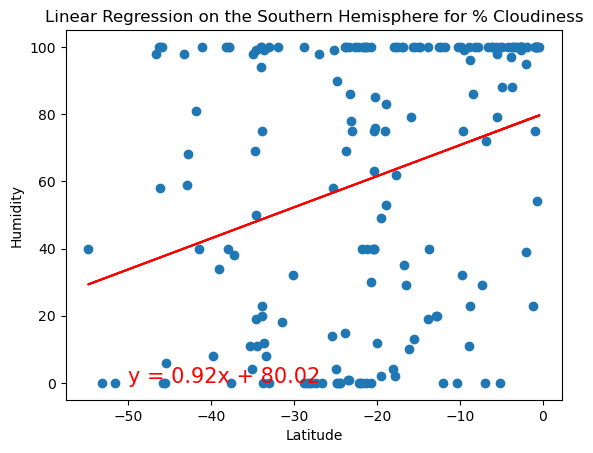

LinregressResult(slope=0.9247451873894691, intercept=80.02457342269744, rvalue=0.30429159114740634, pvalue=3.118249391403725e-05, stderr=0.21637475376615356, intercept_stderr=5.367472085414612)

In [25]:
#perform linear regression on Percent Cloudiness for Southern Hemisphere

x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       'Humidity', (-50,0))

linregress(x_values,y_values)

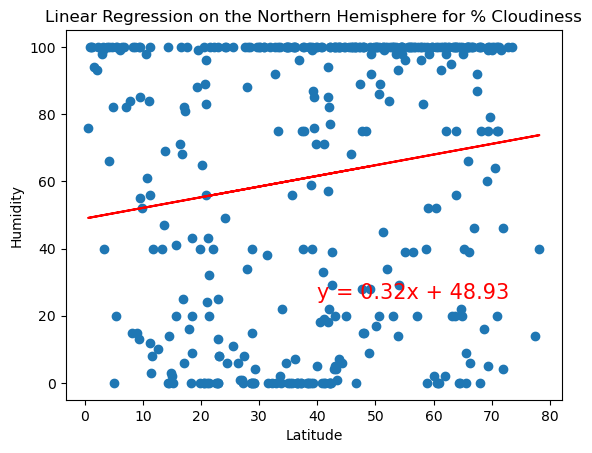

LinregressResult(slope=0.3172400528503282, intercept=48.929586377495156, rvalue=0.1525673718633469, pvalue=0.0025194350384648125, stderr=0.10432688413798101, intercept_stderr=4.667048894926872)

In [26]:
#perform linear regression on Percent Cloudiness for Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       'Humidity', (40,25))

linregress(x_values,y_values)

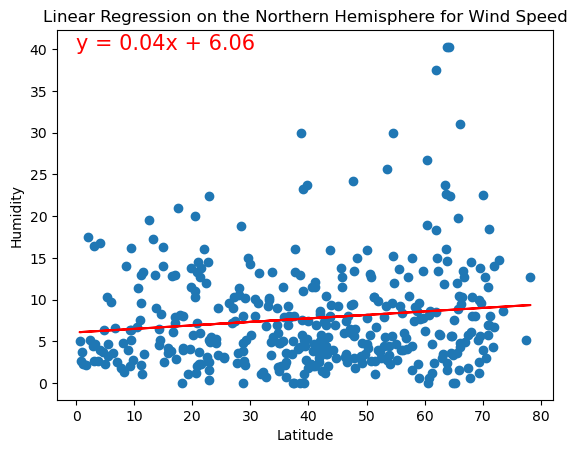

LinregressResult(slope=0.041901103523738464, intercept=6.06112186067281, rvalue=0.13287322610016397, pvalue=0.008607243402402265, stderr=0.015867337996856676, intercept_stderr=0.7098231953876719)

In [27]:
#perform linear regression on Percent Wind Speed for Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Humidity', (0,40))

linregress(x_values,y_values)

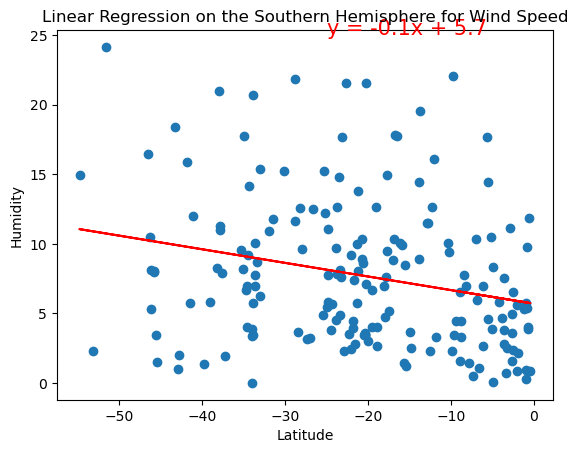

LinregressResult(slope=-0.09785054252031106, intercept=5.695258614505297, rvalue=-0.24696855575307664, pvalue=0.0008032441679607217, stderr=0.028696528834986464, intercept_stderr=0.7118566967223472)

In [28]:
#perform linear regression on Percent Wind Speed for Northern Hemisphere

x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]

#call the fuction

plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Humidity', (-25,25))

linregress(x_values,y_values)